In [2]:
class Graph():
    def __init__(self):
     self.operations=[]
     self.placeholders=[]
     self.variables=[]
    
    def setAsDefault(self):
        global defaultGraph
        defaultGraph=self

In [32]:
import numpy as np

In [3]:
#parent class for operation
class Operate():
    def __init__(self,inputNodes=[]):
        self.inputNodes=inputNodes
        self.outputNodes=[]
        
        for nodes in inputNodes:
          nodes.outputNodes.append(self)
        
        defaultGraph.operations.append(self) 
    
    def compute(self):
        pass

In [4]:
class Addition(Operate):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x,y):
      self.inputs=[x,y]
      return x+y

In [5]:
class Multiplication(Operate):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x,y):
      self.inputs=[x,y]
      return x*y

In [6]:
#Matrix multiplication
class MatrixMultiplication(Operate):
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x,y):
      self.inputs=[x,y]
      return x.dot(y)

In [7]:
class Placeholder():
    def __init__(self):
        self.outputNodes=[]
        
        defaultGraph.placeholders.append(self)


In [8]:
class Variable():
    def __init__(self,initialValue=[]):
        self.value=initialValue
        self.outputNodes=[]
        
        defaultGraph.variables.append(self)

In [33]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes.  Makes sure computations are done in 
    the correct order (Ax first , then Ax + b). 
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operate):
            for input_node in node.inputNodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [40]:
class Session:
    
    def run(self, operation, feed_dict = {}):
       
        
        #correct order of Nodes
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [inputNode.output for inputNode in node.inputNodes]

                 
                node.output = node.compute(*node.inputs)
                
           
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output




In [41]:
class Sigmoid(Operate):
 
    
    def __init__(self, z):

        # a is the input node
        super().__init__([z])

    def compute(self, zVal):
        
        return 1/(1+np.exp(-zVal))

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
dataset=make_blobs(n_samples = 40,n_features=2,centers=2,random_state=50)

dataset

In [63]:
dataset

(array([[-4.66827781, -1.82158821],
        [-5.13629819, -0.96528085],
        [-0.3083834 , -4.69529985],
        [ 0.03156439, -5.15286854],
        [-4.08533248, -3.66128664],
        [ 0.01589917, -4.69555252],
        [-4.85151363, -2.28666849],
        [-1.10549315, -3.83942962],
        [-4.79454359, -1.5487151 ],
        [-0.50192294, -5.29022209],
        [-0.52020154, -5.59905297],
        [-4.14395261, -3.01703939],
        [ 0.74939487, -6.9445272 ],
        [-0.25773373, -4.74803119],
        [ 0.01837055, -4.5761442 ],
        [ 0.64555459, -5.07487332],
        [-5.24937995, -1.69487411],
        [-0.73238425, -5.06258391],
        [-5.78147614, -2.34404814],
        [-0.38922908, -3.72743059],
        [-2.18526653, -3.56479031],
        [-4.80340682, -2.03913344],
        [-0.42267757, -4.06505674],
        [-5.68373814, -2.1122372 ],
        [-3.65963603, -4.44685518],
        [-2.82470203, -0.98556792],
        [-4.92163249, -5.88329218],
        [-6.5568737 , -2.292

In [14]:
features=dataset[0]
labels=dataset[1]

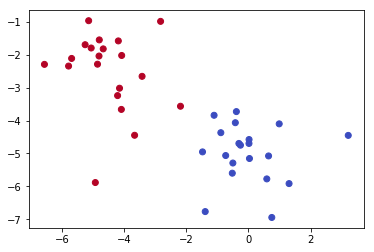

In [15]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

In [16]:

#y=mx+b 
#y=−x+5
#f1=mf2+b,m=1
#f1=−f2+5
#f1+f2−5=0

g =Graph()


In [18]:
g.setAsDefault()

In [19]:
x = Placeholder()

In [20]:
w = Variable([1,1])

In [21]:
b = Variable(-5)

In [24]:
z = Addition(MatrixMultiplication(w,x),b)


In [45]:
a = Sigmoid(z)

In [46]:
sess = Session()

In [47]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.99999773967570205

In [48]:
sess.run(operation=a,feed_dict={x:[0,2]})

0.047425873177566781